In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

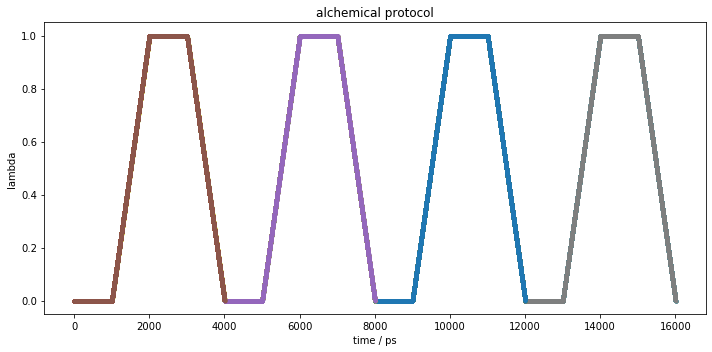

In [2]:
# Check protocol
from glob import glob
files = glob('PROJ13400/RUN*/CLONE*/results*/globals.csv')
nfiles = len(files)
fig = plt.figure(figsize=[10,5])
for index, file in enumerate(files):
    df = pd.read_csv(file)
    time = df['Time'].to_numpy()
    lambda_t = df['lambda'].to_numpy()
    plt.plot(time, lambda_t, '.')    
    plt.title('alchemical protocol')

plt.xlabel('time / ps')
plt.ylabel('lambda')
plt.tight_layout()

/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


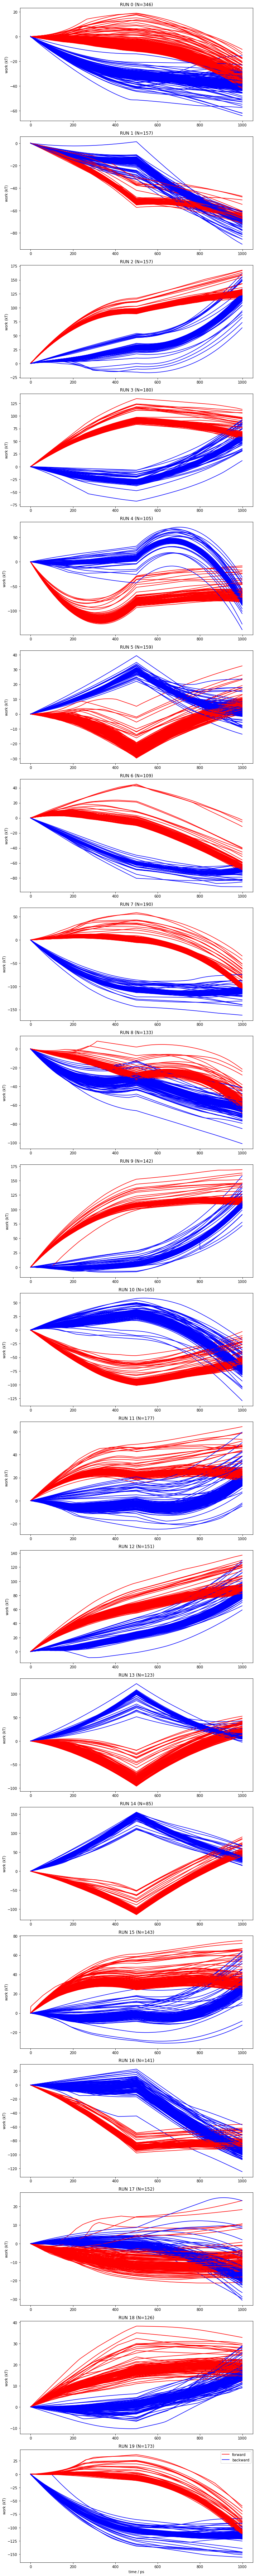

In [6]:
fig = plt.figure(figsize=[10,100])
from glob import glob
project = 'PROJ13400'
phase = 'complex'

NRUNS = 20
for run in range(NRUNS):
    plt.subplot(NRUNS,1,run+1)
    files = glob(f'{project}/RUN{run}/CLONE*/results?/globals.csv')
    nfiles = len(files)
    kT = 4.184 * 0.6
    nresults = 0
    for index, file in enumerate(files):
        try:
            df = pd.read_csv(file)
            time = df['Time'].to_numpy()
            lambda_t = df['lambda'].to_numpy()
            protocol_work = df['protocol_work'].to_numpy()
            forward_work = protocol_work[1000:2000] - protocol_work[1000]
            backwards_work = protocol_work[3000:4000] - protocol_work[3000]
            plt.plot(forward_work/kT, 'r-')    
            plt.plot(-backwards_work/kT, 'b-')    
        except Exception as e:
            print(e)
        nresults += 1
    
    plt.title(f'RUN {run} (N={nresults})')
    plt.ylabel('work (kT)')

plt.xlabel('time / ps')    
plt.legend(['forward','backward'])
plt.tight_layout()
plt.savefig(f'{project}-{phase}-work-vs-time.pdf')
#plt.savefig('PROJ13401-solvent-work-vs-time.pdf')

Step,Time,lambda_angles,lambda_bonds,lambda_electrostatics_core,lambda_electrostatics_delete,lambda_electrostatics_insert,lambda_sterics_core,lambda_sterics_delete,lambda_sterics_insert,lambda_torsions,softcore_alpha,Enew,Eold,_restorable__class_hash,a,b,has_kT_changed,kT,lambda,lambda_step,n_lambda_steps,n_steps_eq,n_steps_neq,n_steps_per_cycle,protocol_work,step
0,25.0000000000017,0,0,0,0,0,0,0,0,0,0.5,0,0,3585150242,0.996007989343991,0.0892641314467314,1,2.47771279642362,0,0,250000,250000,250000,1000000,0,0
250,26.000000000002,0,0,0,0,0,0,0,0,0,0.5,-479378.411849645,-479378.411849645,3585150242,0.996007989343991,0.0892641314467314,0,2.47771279642362,0,250,250000,250000,250000,1000000,0,250

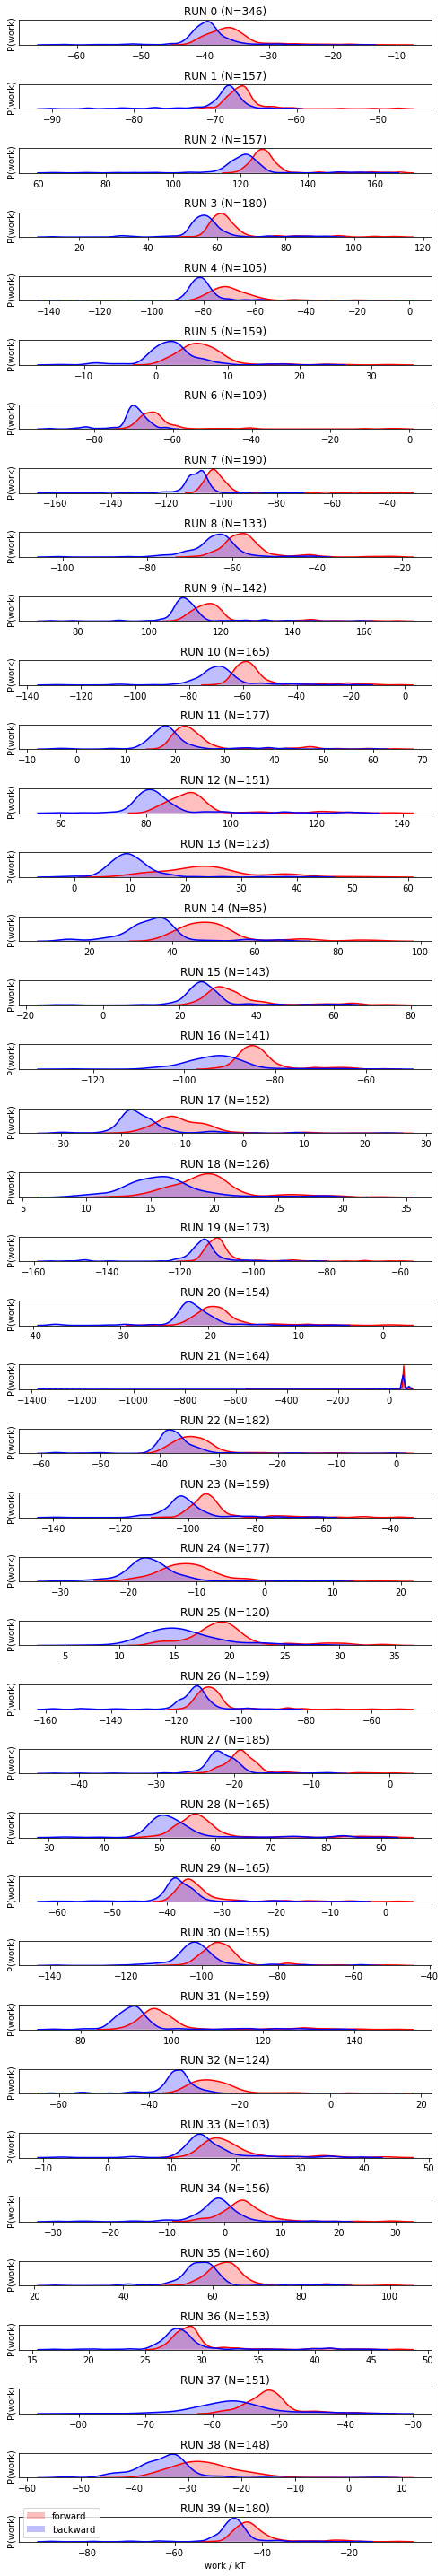

In [8]:
import seaborn as sns
fig = plt.figure(figsize=[7,40])
from glob import glob
NRUNS = 160
project = 'PROJ13400'
phase = 'complex'

NRUNS = 40 # DEBUG
for run in range(NRUNS):
    plt.subplot(NRUNS,1,run+1)
    files = glob(f'{project}/RUN{run}/CLONE*/results?/globals.csv')
    nfiles = len(files)
    kT = 4.184 * 0.6
    nresults = 0
    forward_work = list()
    backward_work = list()
    for index, file in enumerate(files):
        try:
            df = pd.read_csv(file)
            time = df['Time'].to_numpy()
            lambda_t = df['lambda'].to_numpy()
            protocol_work = df['protocol_work'].to_numpy()
            forward_work.append((protocol_work[2000] - protocol_work[1000]) / kT)
            backward_work.append((protocol_work[4000] - protocol_work[3000]) / kT)
        except Exception as e:
            print(e)
        nresults += 1

    forward_work = np.array(forward_work)
    backward_work = np.array(backward_work)
    seaborn.kdeplot(forward_work, shade=True, color='red')
    seaborn.kdeplot(-backward_work, shade=True, color='blue')
    
    plt.title(f'RUN {run} (N={nresults})')
    plt.ylabel('P(work)')
    plt.yticks([])

plt.xlabel('work / kT')    
plt.legend(['forward','backward'])
plt.tight_layout()
plt.savefig(f'{project}-{phase}-work-distribution.pdf')
#plt.savefig('PROJ13401-solvent-work-vs-time.pdf')

In [9]:
import numpy as np
import pandas as pd
from glob import glob
kT = 4.184 * 0.596

projects = {
    'complex' : 'PROJ13400',
    'solvent' : 'PROJ13401'
}

for phase in ['complex', 'solvent']:
    project = projects[phase]

    runs = glob(f'{project}/RUN*')
    NRUNS = len(runs)

    for run in range(NRUNS):
        files = glob(f'{project}/RUN{run}/CLONE*/results?/globals.csv')
        nfiles = len(files)
        forward_work = list()
        backward_work = list()
        for index, file in enumerate(files):
            try:
                df = pd.read_csv(file)
                protocol_work = df['protocol_work'].to_numpy()
                forward_work.append((protocol_work[1000:2000] - protocol_work[1000]) / kT)
                backward_work.append((protocol_work[3000:4000] - protocol_work[3000]) / kT)
            except Exception as e:
                print(e)
        
        forward_work = np.array(forward_work)
        backward_work = np.array(backward_work)
        np.save(f'work/{project}-{phase}-RUN{run}-forward-work.npy', forward_work)
        np.save(f'work/{project}-{phase}-RUN{run}-backward-work.npy', backward_work)
    


index 1000 is out of bounds for axis 0 with size 6
unsupported operand type(s) for -: 'str' and 'str'
Error tokenizing data. C error: Expected 29 fields in line 2752, saw 35

Error tokenizing data. C error: Expected 29 fields in line 5212, saw 41

Error tokenizing data. C error: Expected 29 fields in line 7790, saw 51

Error tokenizing data. C error: Expected 29 fields in line 7269, saw 50

Error tokenizing data. C error: Expected 29 fields in line 13032, saw 35

Error tokenizing data. C error: Expected 29 fields in line 5131, saw 35

Error tokenizing data. C error: Expected 29 fields in line 4461, saw 30

Error tokenizing data. C error: Expected 29 fields in line 10546, saw 34

Error tokenizing data. C error: Expected 29 fields in line 11287, saw 38

Error tokenizing data. C error: Expected 29 fields in line 5842, saw 53

Error tokenizing data. C error: Expected 29 fields in line 6515, saw 51

Error tokenizing data. C error: Expected 29 fields in line 9201, saw 45

Error tokenizing da

In [32]:
def build_index(csv_filename):
    import re
    runs = dict()
    with open(csv_filename, 'r') as infile:
        for line in infile:
            run, system_name, source_directory, i, j = line.strip().split(',')
            m = re.search('RUN(\d+)', run)
            run_index = m.group(1)        
            runs[(i,j)] = run_index
    return runs

runs = dict()                        
runs['complex'] = build_index('work/PROJ13400-complex-run-index.csv')
runs['solvent'] = build_index('work/PROJ13401-solvent-run-index.csv')

projects = {
    'complex' : 'PROJ13400',
    'solvent' : 'PROJ13401'
}

from pymbar import BAR

for (i,j) in runs['complex'].keys():    
    try:
        DeltaF = dict()
        dDeltaF = dict()
        for phase in ['complex', 'solvent']:
            project = projects[phase]
            run_index = runs[phase][(i,j)]
            #print(f'{project}-{phase}-RUN{run_index}-forward-work.npy')
            forward_work = np.load(f'work/{project}-{phase}-RUN{run_index}-forward-work.npy')
            backward_work = np.load(f'work/{project}-{phase}-RUN{run_index}-backward-work.npy')
            DeltaF[phase], dDeltaF[phase] = BAR(forward_work[:,-1], backward_work[:,-1])
            #print(f'RUN{run_index:8} : {DeltaF[phase]:8.1f} +- {dDeltaF[phase]:5.1f}')
        DeltaF_bind = DeltaF['complex'] - DeltaF['solvent']
        dDeltaF_bind = np.sqrt(dDeltaF['complex']**2+dDeltaF['solvent']**2)
        print(f'RUN{run_index:8} : {DeltaF_bind:8.3f} +- {dDeltaF_bind:5.3f}')
    except Exception as e:
        pass
        
        


RUN0        :    2.022 +- 0.092
RUN1        :    0.018 +- 0.107
RUN2        :    3.193 +- 0.180
RUN3        :    3.018 +- 0.191
RUN4        :    3.606 +- 0.293
RUN5        :    3.284 +- 0.149
RUN6        :    4.864 +- 0.259
RUN7        :    1.913 +- 0.178
RUN8        :   -3.215 +- 0.193
RUN9        :    1.990 +- 0.210
RUN10       :   45.054 +- 0.213
RUN11       :   78.456 +- 0.158
RUN12       :  -25.005 +- 0.214
RUN13       :   69.566 +- 0.565
RUN14       :    8.906 +- 0.178
RUN15       : -168.933 +- 0.220
RUN16       :  -27.311 +- 0.285
RUN17       : -152.046 +- 0.410
RUN18       :   28.953 +-   nan
RUN19       :   -9.571 +- 0.295
RUN20       :    4.582 +- 0.158
RUN21       :    2.984 +- 0.166
RUN22       :   90.910 +- 0.130


/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/pymbar/bar.py:473: RuntimeWarning: divide by zero encountered in log
  log_fR = - np.log(np.exp(-max_arg_R) + np.exp(exp_arg_R - max_arg_R))
/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/pymbar/bar.py:482: RuntimeWarning: invalid value encountered in double_scalars
  variance = (afF2/afF**2)/T_F + (afR2/afR**2)/T_R - nrat


RUN23       :   75.555 +- 0.200
RUN24       :  -88.466 +- 0.126
RUN25       :  -61.719 +- 0.178
RUN26       :  189.118 +- 0.199
RUN27       : -123.527 +- 0.649
RUN28       :   50.878 +- 0.229
RUN29       :   43.050 +- 0.211
RUN30       :  -51.817 +- 0.172
RUN31       :  -86.976 +- 0.182
RUN32       :  104.098 +-   nan
RUN33       :   69.137 +- 0.187
RUN34       :   40.547 +- 0.152
RUN35       :  -30.746 +- 0.193
RUN36       : -174.183 +- 0.205
RUN37       :   39.955 +- 0.159
RUN38       :    0.027 +-   nan
RUN39       :  151.675 +- 0.228
RUN40       :  112.821 +- 0.184


/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/pymbar/bar.py:467: RuntimeWarning: divide by zero encountered in log
  log_fF = - np.log(np.exp(-max_arg_F) + np.exp(exp_arg_F - max_arg_F))


RUN41       :   93.254 +- 0.287
RUN42       :  -45.373 +- 0.201
RUN43       :   27.885 +- 0.206
RUN44       :   93.130 +- 0.204
RUN45       :    0.231 +- 0.199
RUN46       :    4.404 +- 0.470
RUN47       :   -0.916 +- 0.178
RUN48       :   -0.497 +- 0.137
RUN49       :    3.930 +- 0.175
RUN50       :   -2.304 +- 0.147
RUN51       :    1.473 +- 0.249
RUN52       :   -1.592 +- 0.149
RUN53       :    4.152 +- 0.263
RUN54       :    5.061 +- 0.192
RUN55       :    4.604 +- 0.252
RUN56       :    5.589 +- 0.210
RUN57       :    0.511 +- 0.205
RUN58       :   -3.623 +- 0.166
RUN59       :   -1.558 +- 0.200
RUN60       :    4.105 +- 0.149
RUN61       :    0.389 +- 0.117
RUN62       :   -0.208 +- 0.175
RUN63       :    0.381 +-   nan
RUN64       :    4.634 +- 0.253
RUN65       :   -2.237 +- 0.173
RUN66       :    1.773 +- 0.184
RUN67       :   -1.328 +- 0.127
RUN68       :   -0.606 +- 0.174
RUN69       :    3.768 +- 0.236
RUN70       :    2.995 +- 0.347
RUN71       :  -90.025 +- 0.091
RUN72   

/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/pymbar/bar.py:135: RuntimeWarning: invalid value encountered in less
  max_arg_R = np.choose(np.less(0.0, exp_arg_R), (0.0, exp_arg_R))
/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/pymbar/bar.py:118: RuntimeWarning: invalid value encountered in less
  max_arg_F = np.choose(np.less(0.0, exp_arg_F), (0.0, exp_arg_F))


RUN80       :    3.271 +- 0.324
RUN81       :    3.623 +- 0.356
RUN82       :    5.572 +- 0.169
RUN83       :    3.589 +- 0.162
RUN84       :    1.361 +- 0.457
RUN85       :   -2.144 +- 0.211
RUN86       :   -1.962 +- 0.229
RUN87       :   -3.444 +- 0.178
RUN88       :   -1.690 +- 0.254
RUN89       :    1.203 +- 0.093
RUN90       :   -1.041 +- 0.165
RUN91       :   -2.564 +- 0.207
RUN92       :    2.064 +- 0.148
RUN93       :    5.511 +- 0.252
RUN94       :    0.574 +- 0.088
RUN95       :    3.874 +- 0.124
RUN96       :   -0.471 +- 0.143
RUN97       :    3.796 +- 0.160
RUN98       :    1.449 +- 0.165
RUN99       :   -0.425 +- 0.214
RUN100      :    2.107 +- 0.275
RUN101      :   -1.387 +- 0.199
RUN102      :   -1.990 +- 0.181
RUN103      :    1.008 +- 0.139
RUN104      :   -4.131 +- 0.277
RUN105      :    6.360 +- 0.497
RUN106      :   -1.272 +- 0.510
RUN107      :   -0.413 +- 0.157
RUN108      :   -2.155 +-   nan
RUN109      :    3.836 +- 0.152
RUN110      :    0.263 +- 0.105
RUN111  

/Users/choderaj/miniconda/envs/perses/lib/python3.7/site-packages/pymbar/bar.py:483: RuntimeWarning: invalid value encountered in sqrt
  dDeltaF = np.sqrt(variance)


RUN141      :   -7.822 +- 1.013
RUN142      :    1.534 +- 0.341
RUN143      :    4.079 +- 0.183
RUN144      :    1.753 +- 0.458
RUN145      :    6.378 +- 0.172
RUN146      :    2.524 +- 0.185
RUN147      :    3.968 +- 0.164
RUN148      :    5.736 +- 0.137


In [60]:
forward_work

array([[ 0.00000000e+00, -2.66877128e-02, -5.69676925e-02, ...,
        -3.63827069e+01, -3.64972174e+01, -3.66155412e+01],
       [ 0.00000000e+00, -2.12106074e-03, -2.12265548e-03, ...,
        -1.78749879e+01, -1.79746967e+01, -1.80734830e+01],
       [ 0.00000000e+00, -1.88433556e-02, -4.37898052e-02, ...,
        -3.64387445e+01, -3.65481430e+01, -3.66572472e+01],
       ...,
       [ 0.00000000e+00, -4.62961367e-03, -1.05433286e-02, ...,
        -3.68505357e+01, -3.69738965e+01, -3.70794428e+01],
       [ 0.00000000e+00, -1.56922394e-02, -3.18609814e-02, ...,
        -3.69352235e+01, -3.70455661e+01, -3.71647882e+01],
       [ 0.00000000e+00, -2.91491919e-03, -5.60062652e-03, ...,
        -2.49144541e+01, -2.50291372e+01, -2.51439163e+01]])